## 학습목표
- 시간대 정보를 도입하여 0시 교통량 예측 모델의 성능을 개선하는 방법을 학습한다.
- 모든 시간대의 교통량 데이터를 활용하여 모델이 시간대 간 상관관계를 학습하도록 한다. 
- 모델을 개선한 후 R² 점수를 통해 성능 변화를 평가하고 분석하는 방법을 익힌다..   

## 학습 개념  
과제 1에서는 **요일 정보**만을 사용해 0시 교통량을 예측하려고 하였으나, 성능이 낮았습니다. 이를 개선하기 위해, 과제 2에서는 **0시부터 23시까지의 모든 시간대 교통량 데이터**를 추가하여 모델이 **시간대 간의 상관관계**를 학습할 수 있도록 합니다. 다양한 시간대의 데이터를 모델에 입력함으로써 교통량의 패턴을 학습하게 하고, 더 정확한 예측을 가능하게 합니다.


## 학습 방향  
> 김싸피는 서울시 교통공사 데이터 분석가로서, 서울시의 교통 데이터를 분석하는 업무를 맡았습니다. 그는 2023년 1월의 교통량 데이터를 활용하여 요일과 시간대별 교통량을 바탕으로 교통 패턴을 예측하는 선형 회귀 모델을 구축하려 합니다. 기존의 과제 1보다 더 나은 성능을 달성하는 것이 목표입니다. 다음을 수행하세요.

1. 데이터 불러오기: pandas를 사용하여 엑셀 데이터를 로드하고, '일자' 컬럼을 날짜 형식으로 변환하세요.
2. 데이터 가공: '일자'를 이용해 요일을 계산하고, 2023년 1월 시트의 0시부터 23시까지의 모든 시간대 교통량 데이터를 독립 변수로 설정하세요.
3. 특징과 목표 변수 설정: 요일과 0시부터 23시까지의 교통량을 독립 변수(X)로 설정하고, 종속 변수(y)를 교통량 예측 대상 컬럼으로 정하세요.
4. 모델 학습: 데이터를 학습용(80%)과 테스트용(20%)으로 나눈 후, 선형 회귀 모델을 학습하세요.
5. 모델 평가: 테스트 데이터를 사용해 모델의 R² 점수를 계산하고, 기존 과제 1의 결과와 비교하세요.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기


In [2]:
# 1. 데이터 불러오기
# pandas로 엑셀 데이터를 불러옵니다.
# file_path는 불러올 엑셀 파일의 경로입니다.
# sheet_name은 불러올 시트의 이름을 지정하는데, 여기서는 '2023년 01월' 데이터를 가져옵니다.
# 참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
file_path = '../data/2023년 01월 서울시 교통량.xlsx'
data = pd.read_excel(file_path, sheet_name="2023년 01월")

# 데이터를 살펴보면 현재 일자와 요일이 일치하지 않습니다. 그렇기 때문에 일자 칼럼을 이용하여 요일을 다시 계산해야 합니다.

In [3]:
data.head(2)

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20230101,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,564.0,414.0,268.0,208.0,...,1388.0,1370.0,1322.0,1263.0,979.0,875.0,785.0,824.0,552.0,421.0
1,20230102,월,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,294.0,190.0,146.0,134.0,...,1459.0,1571.0,1566.0,1792.0,1582.0,1248.0,997.0,973.0,872.0,616.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      8618 non-null   int64  
 1   요일      8618 non-null   object 
 2   지점명     8618 non-null   object 
 3   지점번호    8618 non-null   object 
 4   방향      8618 non-null   object 
 5   구분      8618 non-null   object 
 6   0시      6589 non-null   float64
 7   1시      6588 non-null   float64
 8   2시      6584 non-null   float64
 9   3시      6569 non-null   float64
 10  4시      6567 non-null   float64
 11  5시      6566 non-null   float64
 12  6시      6569 non-null   float64
 13  7시      6570 non-null   float64
 14  8시      6572 non-null   float64
 15  9시      6576 non-null   float64
 16  10시     6581 non-null   float64
 17  11시     6588 non-null   float64
 18  12시     6587 non-null   float64
 19  13시     6587 non-null   float64
 20  14시     6592 non-null   float64
 21  15시     6592 non-null   float64
 22  

# 2. '일자' 컬럼을 datetime 형식으로 변환
지금 일자 정보를 보면 
```0   일자      8618 non-null   int64  ``` int임
우리는 이 데이터를 datatime 형식으로 변환하고 싶음.

```0   일자      8618 non-null   datetime64[ns]```


In [5]:
# 2. '일자' 컬럼을 datetime 형식으로 변환
# 이를 datetime 형식으로 변환하면 날짜 관련 작업이 더 쉬워집니다.
# pandas의 to_datetime 함수를 사용하여 '일자' 데이터를 날짜 형식으로 변환합니다.
# (참고: '일자' 컬럼은 날짜를 나타내는 값인데, 이 컬럼의 각 값들은 정수 형식(YYYYMMDD)으로 되어 있습니다.)
# 참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
data['일자'] = pd.to_datetime(data['일자'], format = '%Y%m%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      8618 non-null   datetime64[ns]
 1   요일      8618 non-null   object        
 2   지점명     8618 non-null   object        
 3   지점번호    8618 non-null   object        
 4   방향      8618 non-null   object        
 5   구분      8618 non-null   object        
 6   0시      6589 non-null   float64       
 7   1시      6588 non-null   float64       
 8   2시      6584 non-null   float64       
 9   3시      6569 non-null   float64       
 10  4시      6567 non-null   float64       
 11  5시      6566 non-null   float64       
 12  6시      6569 non-null   float64       
 13  7시      6570 non-null   float64       
 14  8시      6572 non-null   float64       
 15  9시      6576 non-null   float64       
 16  10시     6581 non-null   float64       
 17  11시     6588 non-null   float64       
 18  12시     

# 3. 날짜를 기반으로 요일을 자동으로 계산
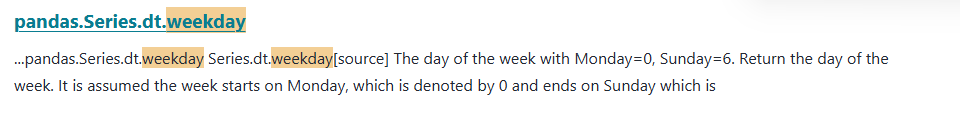

```weekday```함수는 시리즈에 적용되는 함수임
series.dt.weekday로 써야됨.

In [6]:
# data[data['일자']] 아님 얘는 조건식이나 행 인덱싱
#데이터프레임
data[ ['일자']]

,일자
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
8613,2023-01-27
8614,2023-01-28
8615,2023-01-29
8616,2023-01-30


In [7]:
#컬럼만 출력하면 - 시리즈 
data['일자']

0      2023-01-01
1      2023-01-02
2      2023-01-03
3      2023-01-04
4      2023-01-05
          ...    
8613   2023-01-27
8614   2023-01-28
8615   2023-01-29
8616   2023-01-30
8617   2023-01-31
Name: 일자, Length: 8618, dtype: datetime64[ns]

In [8]:
data['일자'].info()
#데이터프레임에서 열만 가져오면 시리즈다

<class 'pandas.core.series.Series'>
RangeIndex: 8618 entries, 0 to 8617
Series name: 일자
Non-Null Count  Dtype         
--------------  -----         
8618 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 67.5 KB


In [9]:
# 3. 날짜를 기반으로 요일을 자동으로 계산
# 요일이 정수로 변환되면 학습 모델에서 이를 숫자형 데이터로 처리할 수 있습니다.
# datetime 형식으로 변환된 '일자' 컬럼을 기반으로 요일을 계산합니다.
# dt.weekday는 '월요일'=0, '일요일'=6을 반환하므로, +1을 해주어 '월요일'=1, '일요일'=7로 변환합니다.
# 참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html
data['요일'] = data['일자'].dt.weekday +1 
data.head(2)

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2023-01-01,7,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,564.0,414.0,268.0,208.0,...,1388.0,1370.0,1322.0,1263.0,979.0,875.0,785.0,824.0,552.0,421.0
1,2023-01-02,1,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,294.0,190.0,146.0,134.0,...,1459.0,1571.0,1566.0,1792.0,1582.0,1248.0,997.0,973.0,872.0,616.0


# 4. 시간대 변수를 그대로 사용


In [10]:
# 4. 시간대 변수를 그대로 사용
# 기존 데이터셋에서 '0시'부터 '23시'까지 시간대별 교통량 데이터가 이미 존재합니다.
# 이를 독립 변수로 사용하여 각 시간대의 교통량 정보를 피처로 추가합니다.
# 시간대 컬럼은 '0시', '1시'... '23시' 등의 이름으로 존재하므로 그대로 사용할 수 있습니다.

data.columns

Index(['일자', '요일', '지점명', '지점번호', '방향', '구분', '0시', '1시', '2시', '3시', '4시',
       '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시',
       '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'],
      dtype='object')

In [11]:
print(data['지점명'].unique())

print()
print(data['방향'].unique())


['성산로(금화터널)' '사직로(사직터널)' '자하문로(자하문터널)' '대사관로(삼청터널)' '율곡로(안국역)'
 '창경궁로(서울여자대학교)' '대학로(한국방송통신대학교)' '종로(동묘앞역)' '퇴계로(신당역)' '동호로(장충체육관)'
 '장충단로(장충단공원)' '퇴계로(회현역)' '세종대로(서울역)' '새문안로(서울역사박물관)' '종로(종로3가역)'
 '서소문로(시청역)' '세종대로(시청역2)' '을지로(을지로3가역)' '칠패로(숭례문)' '남산1호터널' '남산2호터널'
 '남산3호터널' '소월로(회현역)' '소파로(숭의여자대학교)' '도봉로(도봉산역)' '동일로(의정부IC)' '아차산로(워커힐)'
 '망우로(망우리공원)' '경춘북로(중랑경찰서)' '화랑로(조선왕릉)' '북부간선도로(신내IC)' '서하남로(서하남IC)'
 '천호대로(상일IC)' '올림픽대로(강일IC)' '경부고속도로(양재IC)' '송파대로(복정역)' '밤고개로(세곡동사거리)'
 '분당수서로(성남시계)' '과천대로(남태령역)' '양재대로(양재IC)' '반포대로(우면산터널)' '시흥대로(석수역)'
 '금오로(광명시계)' '오리로(광명시계)' '개봉로(개봉교)' '광명대교(광명시계)' '철산교(광명시계)' '금천교(광명시계)'
 '금하로(광명시계)' '오정로(부천시계)' '화곡로(화곡로입구)' '경인고속국도(신월IC)' '경인로(유한공고)'
 '신정로(작동터널)' '김포대로(개화교)' '올림픽대로(개화IC)' '통일로(고양시계)' '서오릉로(고양시계)'
 '수색로(고양시계)' '강변북로(난지한강공원)' '강변북로(구리시계)' '동부간선도로(상도지하차도)' '행주대교' '월드컵대교'
 '가양대교' '성산대교' '양화대교' '서강대교' '마포대교' '원효대교' '한강대교' '동작대교' '반포대교' '잠수교'
 '한남대교' '동호대교' '성수대교' '영동대교' '청담대교' '잠실대교' '올림픽대교' '천호대교' '광진교'
 '진흥로(구기터널)' '평창문화로(북악터널)' '동호로(금호터널)' '서빙고로(

# 5. 데이터 필터링


In [12]:
# 5. 데이터 필터링
# '성산로(금화터널)' 지점에서 '유입' 방향으로 들어오는 데이터만 필터링합니다.
# Boolean indexing을 사용하여 조건을 만족하는 행만 선택합니다.
# Boolean indexing: 조건이 True인 데이터만 선택합니다.
# 예: filtered_data = 데이터프레임[(데이터프레임['컬럼명'] == '값') & (데이터프레임['컬럼명'] == '값')]
# 참고: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing
filtered_data = data[ (data['지점명'] == '성산로(금화터널)') & (data['방향'] == '유입' )]

print(filtered_data['지점명'].unique())
print()
print(filtered_data['방향'].unique())


['성산로(금화터널)']

['유입']


# 6. 피처와 타깃 값 설정


In [13]:
filtered_data.isnull().sum()

일자      0
요일      0
지점명     0
지점번호    0
방향      0
구분      0
0시      0
1시      0
2시      0
3시      0
4시      0
5시      0
6시      0
7시      0
8시      0
9시      0
10시     0
11시     0
12시     0
13시     0
14시     0
15시     0
16시     0
17시     0
18시     0
19시     0
20시     0
21시     0
22시     0
23시     0
dtype: int64

In [14]:
# 6. 피처와 타깃 값 설정
# '요일'과 '시간대' (1시~23시)의 정보를 피처로 사용하고, '0시' 시간대의 교통량을 타깃 값으로 설정합니다.
# 시간대 정보는 이미 데이터셋에서 '1시', '2시' 등의 컬럼으로 존재하므로 이를 독립 변수로 추가합니다.
# pandas의 concat 함수를 사용하여 피처를 결합합니다.
# 참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
# 시간대 컬럼은 '1시', '2시', ..., '23시'로 되어 있으며, 이를 for 루프를 통해 추가할 수 있습니다.
# 시간대 컬럼의 이름은 문자열로 처리됩니다. 이를 이용해 여러 열을 동시에 추가할 수 있습니다.
# 예: str(hour) + '시'를 사용하여 1시, 2시 등의 컬럼명을 만들어 보세요.
X = filtered_data[['요일']]  # 요일 정보를 독립 변수로 사용
X = pd.concat([X, filtered_data[[str(i) + '시' for i in range(1,24)]]], axis=1)
y = filtered_data['0시']

X.head()

,요일,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,7,414.0,268.0,208.0,190.0,314.0,495.0,610.0,881.0,1076.0,...,1388.0,1370.0,1322.0,1263.0,979.0,875.0,785.0,824.0,552.0,421.0
1,1,190.0,146.0,134.0,252.0,684.0,1612.0,2378.0,2356.0,1931.0,...,1459.0,1571.0,1566.0,1792.0,1582.0,1248.0,997.0,973.0,872.0,616.0
2,2,271.0,203.0,177.0,267.0,658.0,1435.0,2309.0,2346.0,2107.0,...,1663.0,1678.0,1711.0,1851.0,1697.0,1265.0,1081.0,1090.0,883.0,757.0
3,3,335.0,247.0,192.0,292.0,639.0,1426.0,2295.0,2335.0,1963.0,...,1679.0,1798.0,1719.0,1807.0,1679.0,1240.0,1112.0,1069.0,909.0,769.0
4,4,334.0,235.0,196.0,300.0,641.0,1385.0,2248.0,2361.0,1959.0,...,1530.0,1627.0,1805.0,1798.0,1770.0,1289.0,1152.0,1111.0,1030.0,756.0


In [15]:
# 7. 학습 데이터와 테스트 데이터 분할
# 학습 데이터와 테스트 데이터를 나누는 함수로 train_test_split을 사용합니다.
# test_size=0.2는 데이터의 20%를 테스트 데이터로 사용한다는 의미입니다.
# random_state=42는 무작위 분할을 고정하여 재현성을 보장합니다.
# 참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [16]:
# 8. 선형 회귀 모델 정의 및 학습
# scikit-learn의 LinearRegression 모델을 사용하여 학습 데이터를 학습시킵니다.
# 모델을 정의한 후, fit 함수를 사용하여 학습 데이터를 학습합니다.
# 참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# 9. 모델 평가
# 학습된 모델을 평가하기 위해 R² 점수를 사용합니다. 1에 가까울수록 성능이 좋은 모델입니다.
# score() 함수는 기본적으로 R² 점수를 반환합니다.
# 참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
r2_score = model.score(X_test,y_test)
print(f"R²: {r2_score}")

R²: 0.49845696871885603
